### imports

In [1]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import glob
import re

%matplotlib inline
%config IPCompleter.greedy=True

______

### Funções

In [2]:
def monta_data_frame(algoritmo, delimitador=';', codificacao_arquivo='ISO-8859-1'):
    # path padrao
    path = '../../resultados/' + algoritmo
    all_files = glob.glob(path + "/*.csv") 
    li = []
    df_res = pd.DataFrame(columns=['n', 'maximo', 'minimo', 'media'])

    for filename in all_files:
        # abrindo arquivo csv e transformando em data frame
        df = pd.read_csv(filename, index_col=None, header=0,  delimiter=delimitador, encoding=codificacao_arquivo)
        
        # calculando max, min e media dos tempos
        regex = re.findall(r'[0-9]+', filename)
        n = int(regex[0])
        minimo = df["duracao (ms)"].min()
        maximo = df["duracao (ms)"].max()
        media = df["duracao (ms)"].mean()
        
        # salvando o resultado em um data frame separado
        df_res.loc[len(df_res)] = [n,maximo,minimo,media]
        
    # retorna um data frame ordenado pelo valor de n
    return df_res.sort_values(by=['n'])

def gera_grafico(data_frame, subtitulo, formato="svg", largura=15, altura=8):
    
    # definindo o tamanho da figura
    figure(figsize=(largura,altura))
    
    # plotando o grafico com matplotlib
    plt.plot(data_frame["n"], data_frame["minimo"], label='minimo', alpha=0.5)
    plt.plot(data_frame["n"], data_frame["maximo"], label='maximo', alpha=0.5)
    plt.plot(data_frame["n"], data_frame["media"], label='media', alpha=0.5)
    
    
    plt.legend(title='Legenda: ')
    plt.ylabel('Tempo (ms)')
    plt.xlabel('Quantidade de itens a serem ordenados')
    plt.suptitle(subtitulo)
    plt.savefig(subtitulo+'.'+formato, format=formato)
    
def salva_arquivo(data_frame, nome, separador=';'):
    data_frame.to_csv(path_or_buf=nome+"_analisado.csv", index = None, header=True, sep=separador)

____

### Executando algoritmos

In [5]:
lista = ['heapsort', 'insertionsort', 'introsort', 'mergesort', 'quicksort', 'timsort', 'selectionsort']

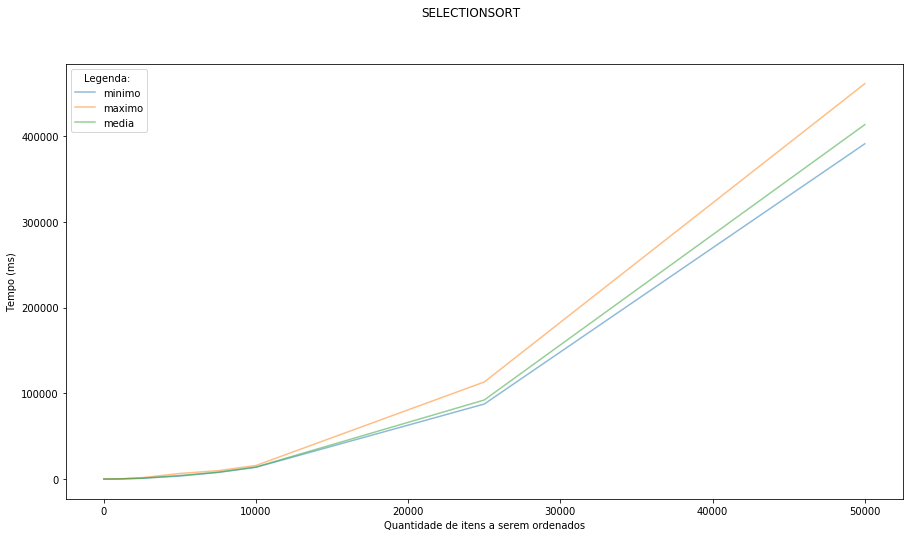

In [6]:
for i in lista:
    df_aux = monta_data_frame(i)
    gera_grafico(df_aux, i.upper())
    salva_arquivo(df_aux, i)

### Juntando algoritmos em um unico grafico

#### Abrindo arquivos 

In [107]:
df_heapsort = pd.read_csv('../../resultados/heapsort/heapsort_analisado.csv', delimiter=';', usecols=["n","media"])
df_heapsort.columns = ["n", "heapsort"]

df_insertionsort = pd.read_csv('../../resultados/insertionsort/insertionsort_analisado.csv', delimiter=';', usecols=["n","media"])
df_insertionsort.columns = ["n", "insertionsort"]

df_introsort = pd.read_csv('../../resultados/introsort/introsort_analisado.csv', delimiter=';', usecols=["n","media"])
df_introsort.columns = ["n", "introsort"]

df_mergesort = pd.read_csv('../../resultados/mergesort/mergesort_analisado.csv', delimiter=';', usecols=["n","media"])
df_mergesort.columns = ["n", "mergesort"]

df_quicksort = pd.read_csv('../../resultados/quicksort/quicksort_analisado.csv', delimiter=';', usecols=["n","media"])
df_quicksort.columns = ["n", "quicksort"]

df_selectionsort = pd.read_csv('../../resultados/selectionsort/selectionsort_analisado.csv', delimiter=';', usecols=["n","media"])
df_selectionsort.columns = ["n", "selectionsort"]

df_timsort = pd.read_csv('../../resultados/timsort/timsort_analisado.csv', delimiter=';', usecols=["n","media"])
df_timsort.columns = ["n", "timsort"]

In [108]:
df_merge = pd.merge(df_heapsort, df_insertionsort, on='n', how='outer')
df_merge = pd.merge(df_merge, df_introsort, on='n', how='outer')
df_merge = pd.merge(df_merge, df_mergesort, on='n', how='outer')
df_merge = pd.merge(df_merge, df_quicksort, on='n', how='outer')
df_merge = pd.merge(df_merge, df_selectionsort, on='n', how='outer')
df_merge = pd.merge(df_merge, df_timsort, on='n', how='outer')

In [109]:
df_merge = df_merge.fillna(0)
df_merge.to_csv(path_or_buf="media_dos_algoritmos.csv", index = None, header=True, sep=';')

In [96]:
df_merge

,n,heapsort,insertionsort,introsort,mergesort,quicksort,selectionsort,timsort
0,10.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,25.0,0.000000,0.100183,0.000000,0.000000,0.000000,0.000000,0.000000
2,50.0,1.562047,0.806403,0.000000,0.000000,0.000000,0.000000,0.000000
3,75.0,0.000000,0.922823,1.562190,1.562309,0.000000,1.556754,0.000000
4,100.0,0.000000,1.210141,0.000000,0.000000,1.562214,1.556563,0.000000
5,250.0,1.561475,7.108712,1.562190,3.124285,0.000000,18.427610,3.120375
6,500.0,7.810783,28.701067,3.117132,3.124380,0.000000,35.982990,1.557207
7,750.0,9.382343,63.868713,4.686308,9.374642,0.000000,79.604673,1.560736
8,1000.0,7.819295,113.049722,3.325701,6.241894,3.128552,133.515811,3.092551
9,2500.0,32.791877,715.238619,17.335868,26.549697,14.059997,951.193357,20.302510


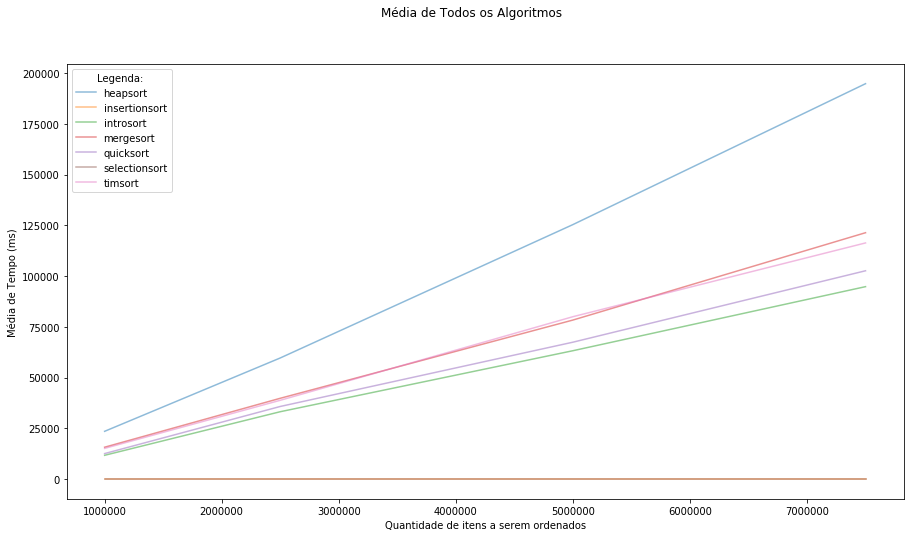

In [106]:
inicio = 20
fim = 24

# definindo o tamanho da figura
figure(figsize=(15,8))

# plotando o grafico com matplotlib
plt.plot(df_merge["n"][inicio:fim], df_merge["heapsort"][inicio:fim], label='heapsort', alpha=0.5)
plt.plot(df_merge["n"][inicio:fim], df_merge["insertionsort"][inicio:fim], label='insertionsort', alpha=0.5)
plt.plot(df_merge["n"][inicio:fim], df_merge["introsort"][inicio:fim], label='introsort', alpha=0.5)
plt.plot(df_merge["n"][inicio:fim], df_merge["mergesort"][inicio:fim], label='mergesort', alpha=0.5)
plt.plot(df_merge["n"][inicio:fim], df_merge["quicksort"][inicio:fim], label='quicksort', alpha=0.5)
plt.plot(df_merge["n"][inicio:fim], df_merge["selectionsort"][inicio:fim], label='selectionsort', alpha=0.5)
plt.plot(df_merge["n"][inicio:fim], df_merge["timsort"][inicio:fim], label='timsort', alpha=0.5)


plt.legend(title='Legenda: ')
plt.ylabel('Média de Tempo (ms)')
plt.xlabel('Quantidade de itens a serem ordenados')
plt.suptitle('Média de Todos os Algoritmos')
plt.savefig('media_dos_algoritmos_'+str(inicio)+'.svg', format='svg')

In [ ]:
df_merge.loc[df_merge.heapsort == 0.0, 'heapsort' ] = ' '
df_merge.loc[df_merge.insertionsort == 0.0, 'insertionsort' ] = ' '
df_merge.loc[df_merge.introsort == 0.0, 'introsort' ] = ' '
df_merge.loc[df_merge.mergesort == 0.0, 'mergesort' ] = ' '
df_merge.loc[df_merge.quicksort == 0.0, 'quicksort' ] = ' '
df_merge.loc[df_merge.selectionsort == 0.0, 'selectionsort' ] = ' '
df_merge.loc[df_merge.timsort == 0.0, 'timsort' ] = ' '